### Reconhecimentos:

In [1]:
# Profundos agradecimentos a Gilvandro César de Medeiros pela confiança e espírito inovador.
# Agradecimentos aos professores Orivaldo Santana e Fábio Souza, pela confiança, ensinos e guia.
# Agradecimentos a Ricardo Halla por dividir dúvidas e tanto conhecimento comigo.
# Agradecimentos a meus amigos e colegas por estarem nesse barco comigo.
# Huge thanks to Chris Albon, whose example helped me writing the Perceptron code. 
#   Please, check out his work: <https://chrisalbon.com/machine_learning/basics/perceptron_in_scikit-learn/>

In [2]:
# This code was written with the amazing help of Gilvandro César de Medeiros.
# Please, check out his work! 
# github.com/gilvandrocesardemedeiros

# Importando bibliotecas que serão úteis:

In [3]:
import numpy as np # necessário para gerar base de dados
import matplotlib.pyplot as plt # necessário para plotagem
import pandas as pd # objetos pandas são comumente utilizados para base de dados
from sklearn.linear_model import Perceptron #modelo de aprendizado de máquina a ser utilizado
from sklearn.model_selection import train_test_split #separar conjuntos de teste e de treino
from sklearn.preprocessing import StandardScaler # necessário pra escalonar os dados
from sklearn.metrics import accuracy_score # averiguar a acurácia dos modelos

# Redes Neurais Artificiais 

Vamos iniciar com alguns conceitos.

A hipótese conexionista é uma alternativa à computação algorítmica, e relembra (em algum ponto) a estrutura do cérebro humano.

"RNAs são sistemas (...) compostos por unidades de processamento simples (neurônios artificiais) que calculam determinadas funções matemáticas (normalmente não-lineares). (...) Na maioria dos modelos essas conexões estão associadas a pesos, os quais armazenam o conhecimento adquirido pelo modelo e servem para ponderar a entrada recebida por cada neurônio da rede." - [Redes Neurais Artificiais: Teoria e Aplicações](https://www.amazon.com.br/Redes-Neurais-Artificiais-Teoria-Aplica%C3%A7%C3%B5es/dp/8521615647), p.3

"*A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.*" —Tom Mitchell, 1997 ([Hands–On Machine Learning with Scikit–Learn and TensorFlow 2e ](https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646?tag=goog0ef-20&smid=A1ZZFT5FULY4LN&ascsubtag=go_1157433115_58530734048_257324212232_aud-519888259198:pla-668130605507_c_))


![alt text](https://developers.google.com/machine-learning/crash-course/images/GradientDescentDiagram.svg)



**O que acha de "brincar" com uma rede neural? Olha só isso [aqui](http://playground.tensorflow.org)!**

**[Isso aqui](http://scs.ryerson.ca/~aharley/vis/conv/) também!**

## Neurônio artificial: Perceptron

O perceptron que vemos aqui pode ser denominado **porta de limiar**. Sua função se resume a comparar uma soma ponderada das entradas com um valor de limiar (*threshold*). Caso a soma exceda o limiar, a saída é ativada, permanecendo desativada caso contrário. ( [Redes Neurais Artificiais: Teoria e Aplicações](https://www.amazon.com.br/Redes-Neurais-Artificiais-Teoria-Aplica%C3%A7%C3%B5es/dp/8521615647), p.23).
![alt text](https://s3.amazonaws.com/stackabuse/media/intro-to-neural-networks-scikit-learn-2.png)

Para o primeiro exemplo, iremos tratar um problema [linearmente separável](https://en.wikipedia.org/wiki/Linear_separability). Isto é, nosso conjunto de dados pode ser separado por um hiperplano (em duas dimensões, uma linha) de forma que nenhum exemplo da **classe A** aparece na "área" da **classe B** e vice-versa.

In [4]:
# Construindo o data-set

# gerando uma matrix 600x2 com dados pseudo-randômicos
data = np.random.randint(low = 0,high = 100,size = (600,2)) 
#Atribuindo os valores de data a um objeto pandas
X = pd.DataFrame(data,columns = ['x1','x2'])

# Vamos supor que pontos acima da linha x2 = 0.6*x1 + 20 pertencem
# à classe 1, e os restantes à classe 0:
y = (0.6*X['x1']+20>X['x2']).astype(int)
  

In [5]:
#Observando nosso data-set

X # Mostrar o dataset



,x1,x2
0,6,12
1,49,87
2,4,73
3,48,65
4,93,69
5,58,31
6,47,91
7,2,46
8,50,78
9,30,81


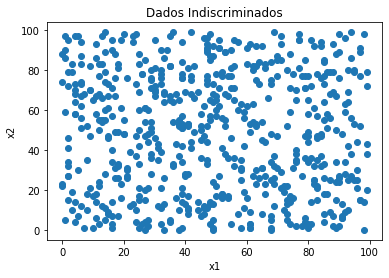

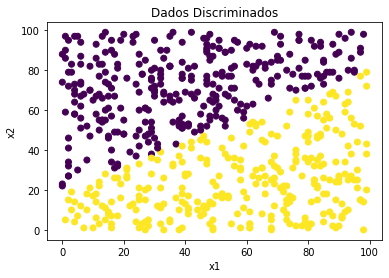

In [6]:
#Que tal mais uma olhada?


plt.figure(1)
plt.title('Dados Indiscriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X['x1'],X['x2'])

plt.figure(2)
plt.title('Dados Discriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X['x1'],X['x2'],c=y)

plt.show()

In [7]:
# Some pre-processing

# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X)

# Apply the scaler to the X training data
X_std = sc.transform(X)


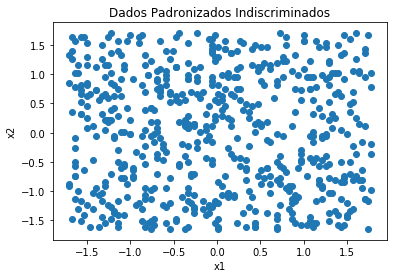

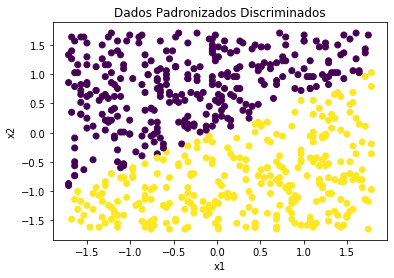

In [8]:
#Let's see what just happened...


plt.figure(1)
plt.title('Dados Padronizados Indiscriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_std[:,0],X_std[:,1])

plt.figure(2)
plt.title('Dados Padronizados Discriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_std[:,0],X_std[:,1],c=y)

plt.show()


In [9]:
# Split the data into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3)

In [10]:
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ptron = Perceptron(max_iter=1000, eta0=0.1, random_state=0)

# Train the perceptron
ptron.fit(X_train, y_train)

#Valores relativos ao aprendizado...
print(f'ptron.coefs_ = {ptron.coef_} , ptron.intercept_ = {ptron.intercept_}')

ptron.coefs_ = [[ 0.66255605 -1.03070047]] , ptron.intercept_ = [0.1]


In [11]:
# Vamos tentar prever os valores relativos a X_test
y_pred = ptron.predict(X_test)

Accuracy: 0.98


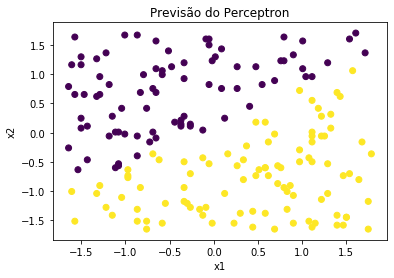

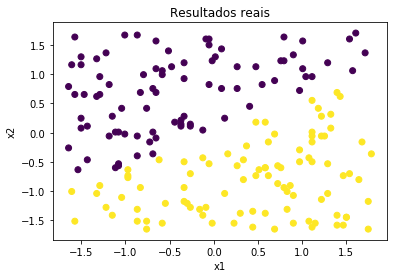

In [12]:
#Let's see what just happened...


#Numericamente...
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
# Confusion matrix... TODO

# Graficamente...
plt.figure(1)
plt.title('Previsão do Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test[:,0],X_test[:,1],c = y_pred)

plt.figure(2)
plt.title('Resultados reais')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test[:,0],X_test[:,1],c = y_test)

plt.show()


Ok, agora vamos lidar com um [problema que não é linearmente separável](https://en.wikipedia.org/wiki/Linear_separability#Examples). Ou seja, não é possível separarmos as classes **com apenas uma linha**.

In [13]:
#Vamos usar a mesma base de dados X. Entretanto, a classificação agora será diferente.

y_2 =( (np.power(X['x1']-80,2)+ np.power(X['x2']-25,2) )>25*25 ).astype(int)
# (x-80)² + (y-25)² = 25²


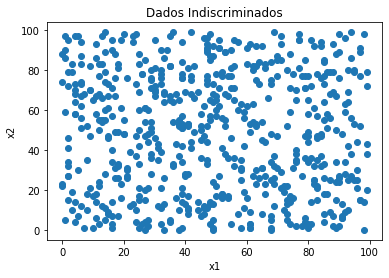

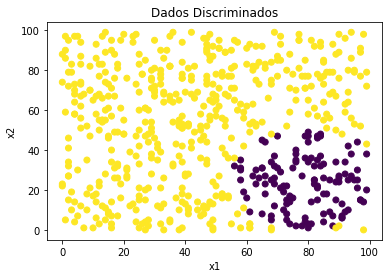

In [14]:
#Observando nosso data-set

plt.figure(1)
plt.title('Dados Indiscriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X['x1'],X['x2'])

plt.figure(2)
plt.title('Dados Discriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X['x1'],X['x2'],c=y_2)

plt.show()


In [15]:
# Split the data into 70% training data and 30% test data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_std, y_2, test_size=0.3)

In [16]:
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ptron_2 = Perceptron(max_iter=1000, eta0=0.1, random_state=0)

# Train the perceptron
ptron_2.fit(X_train_2, y_train_2)

#Valores relativos ao aprendizado...
print(f'ptron_2.coefs_ = {ptron_2.coef_} , ptron_2.intercept_ = {ptron_2.intercept_}')

ptron_2.coefs_ = [[-0.31130186  0.30173443]] , ptron_2.intercept_ = [0.4]


In [17]:
# Vamos tentar prever os valores relativos a X_test
y_pred_2 = ptron_2.predict(X_test_2)

Accuracy: 0.92


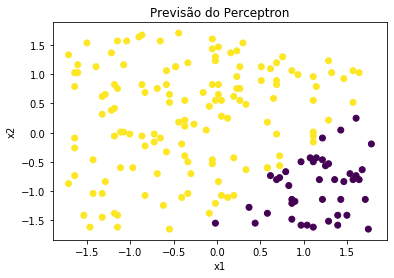

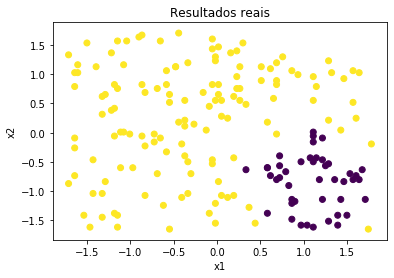

In [18]:
#Let's see what just happened...


#Numericamente...
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.2f' % accuracy_score(y_test_2, y_pred_2))

# Graficamente...
plt.figure(1)
plt.title('Previsão do Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test_2[:,0],X_test_2[:,1],c = y_pred_2)

plt.figure(2)
plt.title('Resultados reais')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test_2[:,0],X_test_2[:,1],c = y_test_2)

plt.show()


Notem que a previsão do perceptron se aproxima do comportamento de uma reta! Isso ocorre porque o perceptron **só consegue lidar com casos linearmente separáveis**. Uma solução para esse problema chama-se [*feature crossing*](https://developers.google.com/machine-learning/crash-course/feature-crosses/video-lecture).

In [19]:
# Adding crossed features
X['xx1'] = np.power(X['x1'],2) # x1²
X['xx2'] = np.power(X['x2'],2) # x2²

X

,x1,x2,xx1,xx2
0,6,12,36,144
1,49,87,2401,7569
2,4,73,16,5329
3,48,65,2304,4225
4,93,69,8649,4761
5,58,31,3364,961
6,47,91,2209,8281
7,2,46,4,2116
8,50,78,2500,6084
9,30,81,900,6561


In [20]:
# Let's pre-process again!

# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X)

# Apply the scaler to the X training data
X_std = sc.transform(X)

In [21]:
# Split the data into 70% training data and 30% test data
new_X_train_2, new_X_test_2, new_y_train_2, new_y_test_2 = train_test_split(X_std, y_2, test_size=0.3)

In [22]:
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
new_ptron_2 = Perceptron(max_iter=1000, eta0=0.1, random_state=0)

# Train the perceptron
new_ptron_2.fit(new_X_train_2, new_y_train_2)

#Valores relativos ao aprendizado...
print(f'new_ptron_2.coefs_ = {new_ptron_2.coef_} , new_ptron_2.intercept_ = {new_ptron_2.intercept_}')

new_ptron_2.coefs_ = [[-0.89119081 -0.74960034  0.21938433  1.38376912]] , new_ptron_2.intercept_ = [0.8]


In [23]:
# Vamos tentar prever os valores relativos a X_test
new_y_pred_2 = new_ptron_2.predict(new_X_test_2)

Accuracy: 0.95


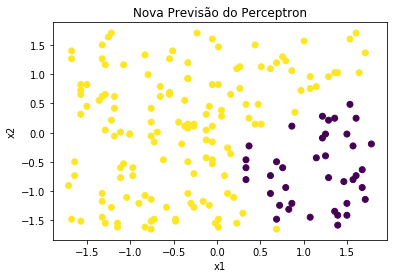

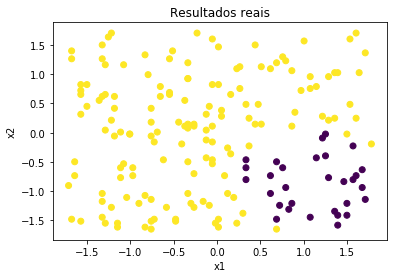

In [24]:
#Let's see what just happened...


#Numericamente...
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.2f' % accuracy_score(new_y_test_2, new_y_pred_2))
# Confusion matrix... TODO

# Graficamente...
plt.figure(1)
plt.title('Nova Previsão do Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(new_X_test_2[:,0],new_X_test_2[:,1],c = new_y_pred_2)

plt.figure(2)
plt.title('Resultados reais')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(new_X_test_2[:,0],new_X_test_2[:,1],c = new_y_test_2)

plt.show()


*Ok, ok... mas alguma coisa mudou?*

Vamos checar os gráficos da antiga, e da nova, previsões do perceptron.

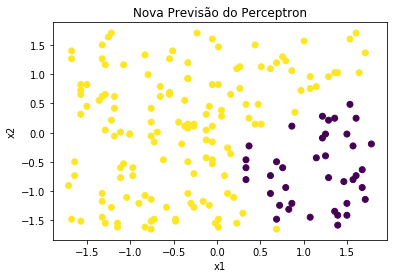

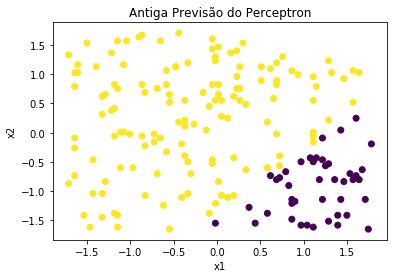

In [25]:
# Graficamente...

plt.figure(1)
plt.title('Nova Previsão do Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(new_X_test_2[:,0],new_X_test_2[:,1],c = new_y_pred_2)

plt.figure(2)
plt.title('Antiga Previsão do Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test_2[:,0],X_test_2[:,1],c = y_pred_2)

plt.show()

<font size="5" color="black"> Um Jupyter-Notebook escrito por <b> Mateus de Assis Silva </b> sob a orientação do Professor <b> Orivaldo Vieira de Santana Junior </b> e acompanhamento de <b> Gilvandro César de Medeiros </b> </font>

<br> Contatos:
<br> Links para Github
<br> Mateus - https://github.com/mtxslv
<br> Gilvandro - https://github.com/gilvandrocesardemedeiros
<br> Orivaldo - https://github.com/orivaldosantana
<br> Link para Linkedin 
<br> Gilvandro - https://www.linkedin.com/in/gilvandromedeiros/